In [1]:
import pandas as pd
xls = pd.ExcelFile('_cs_line_01.xlsx')
df1 = pd.read_excel(xls, '2000m')
df2 = pd.read_excel(xls, '500m')

In [2]:
df1

,x,y,z,nx,ny,nz
0,0.000000,0.120000,38.790432,-0.016114,-0.001873,0.999868
1,2.830830,100.079025,39.023330,-0.016114,-0.001873,0.999868
2,5.661660,200.038060,39.256226,-0.016114,-0.001873,0.999868
3,8.492490,299.997070,39.489124,-0.016114,-0.001873,0.999868
4,11.323318,399.956050,37.059086,-0.016102,0.039069,0.999107
...,...,...,...,...,...,...
1475,-40520.710000,171594.860000,-1608.502300,-0.003224,0.005252,0.999981
1476,-40427.566000,171631.250000,-1608.393100,-0.003224,0.005252,0.999981
1477,-39961.848000,171813.200000,-1607.847000,-0.003224,0.005252,0.999981
1478,-39775.560000,171885.970000,-1607.628500,-0.003224,0.005252,0.999981


In [3]:
# example to calculate KP and plot the alignment sheet
from matplotlib import pyplot as plt
import math
def calKp(df1):
    _cumkp=0
    kp=[]
    for index, point in df1.iterrows():
        if index == 0: 
            kp.append(0)  
            continue
        _kp = math.sqrt( (df1.iloc[[index]].x-df1.iloc[index-1].x)**2 + 
                       (df1.iloc[[index]].y-df1.iloc[index-1].y)**2 + 
                       (df1.iloc[[index]].z-df1.iloc[index-1].z)**2 )
        _cumkp = _cumkp + _kp 
        kp.append(_cumkp)
    return kp
def calAzimuth(df1):
    _az=0
    azimuth=[]
    for index, point in df1.iterrows():
        if index == len(df1)-1:
            azimuth.append(0)
            break
        if index == 0: 
            azimuth.append(0)  
            continue
        _az12 = math.atan( (df1.iloc[[index]].x-df1.iloc[index-1].x) / 
                       (df1.iloc[[index]].y-df1.iloc[index-1].y) ) 
        _az23 = math.atan( (df1.iloc[[index]].x-df1.iloc[index+1].x) / 
                       (df1.iloc[[index]].y-df1.iloc[index+1].y) )
        _az=(_az12+_az23)/2
#         print(_az12,_az23)
        azimuth.append(_az)
    return azimuth


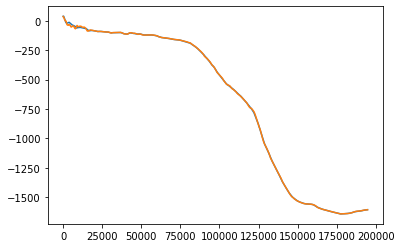

In [4]:
kp=calKp(df1)
df1["kp"] =  kp  
kp=calKp(df2)
df2["kp"] =  kp
plt.plot(df1.kp,df1.z)
plt.plot(df2.kp,df2.z)

In [5]:
# kp ne odgovarju po tockama
min(df1["kp"]- df2["kp"])

-800.7066491748928

In [6]:
dz=df1.z-df2.z
df2["dz"] = dz
dx=df1.x-df2.x
df2["dx"] = dx

In [7]:
# pre velika je razlika u z tako da vjerojatno tocke nisu niti na istom trokutu
print(min(dz),max(dz))
print(min(dx),max(dx))

-85.65059999999994 32.12477799999999
-4801.200000000004 3539.467000000004


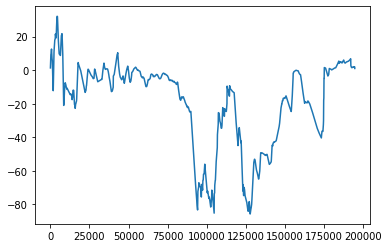

In [8]:
plt.plot(df1.kp,dz)

In [9]:
df2[df2["dz"]==df2["dz"].min()]

,x,y,z,nx,ny,nz,kp,dz,dx
1053,-31840.78,119812.63,-915.8147,-0.018113,0.02029,0.99963,125856.546705,-85.6506,-877.07


In [10]:
# za najvecu razliku u z tocka je 2km vise udaljena
df1[df2["dz"]==df2["dz"].min()]

,x,y,z,nx,ny,nz,kp
1053,-32717.85,121497.89,-1001.4653,-0.041702,0.02675,0.998772,127755.939326


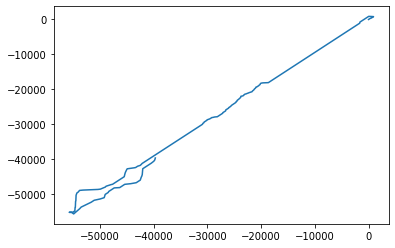

In [11]:
plt.plot(df1.x,df2.x)

# plt.plot(df2.x,df2.y)

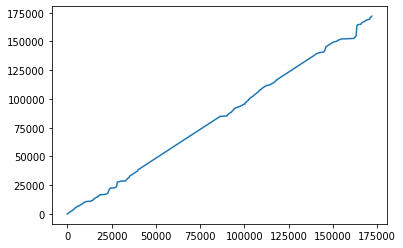

In [12]:
plt.plot(df1.y,df2.y)

In [13]:
import numpy as np
df2["z2000"] = np.interp(df2["kp"], df1["kp"], df1["z"])

In [14]:
df2

,x,y,z,nx,ny,nz,kp,dz,dx,z2000
0,0.000000,0.12000,37.449802,-0.083793,0.030611,0.996013,0.000000,1.340630,0.000000e+00,38.790432
1,2.830831,100.07905,34.615814,-0.083793,0.030611,0.996013,100.039276,4.407516,-6.000000e-07,39.023423
2,5.661662,200.03812,31.785800,-0.071366,0.018117,0.997286,200.078460,7.470426,-2.300000e-06,39.256412
3,8.492495,299.99722,30.172520,-0.071366,0.018117,0.997286,300.090649,9.316604,-5.000000e-06,39.486876
4,14.154160,499.91547,27.373564,-0.027937,0.048984,0.998409,500.108636,9.685522,-2.830842e+00,33.195642
...,...,...,...,...,...,...,...,...,...,...
1475,-41265.855000,171303.75000,-1610.452600,-0.003552,0.003850,0.999986,193054.703105,1.950300,7.451450e+02,-1610.797266
1476,-41172.715000,171340.14000,-1610.275100,-0.003552,0.006408,0.999973,193154.699721,1.882000,7.451490e+02,-1610.490673
1477,-40613.848000,171558.47000,-1609.538000,-0.005636,0.008017,0.999952,193754.700434,1.691000,6.520000e+02,-1608.654849
1478,-40241.273000,171704.03000,-1609.651700,-0.004126,0.010371,0.999938,194154.700256,2.023200,4.657130e+02,-1608.171768


In [15]:
dz=df2.z2000-df2.z
df2["dz_inter"] = dz
dKp = df1["kp"]-df2["kp"]
df2["dKp"] = dKp

In [16]:
df2["dz_inter"].min(), df2["dz_inter"].max()

(-19.920789783942396, 25.275088757825728)

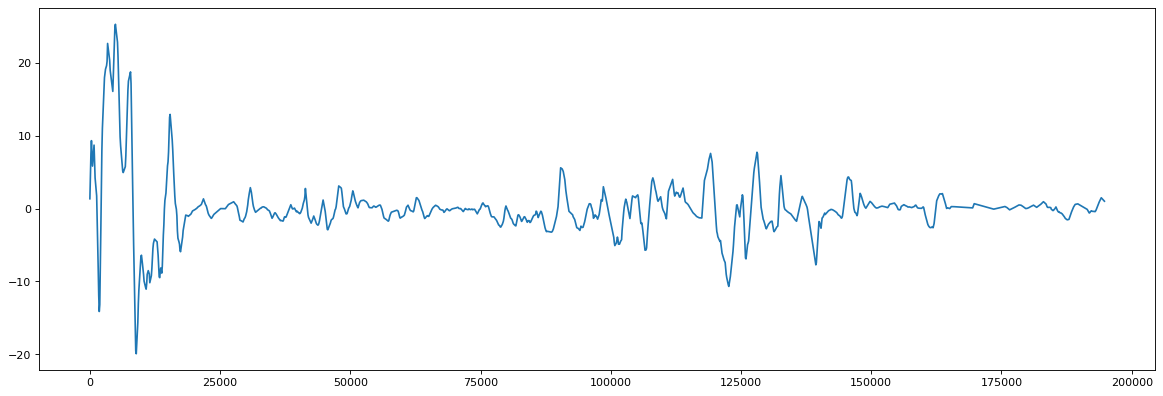

In [17]:
# nije moguce zakljuciti da li je greska kod interpolacije ili adjustmenta. 
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df2["kp"], df2["dz_inter"])


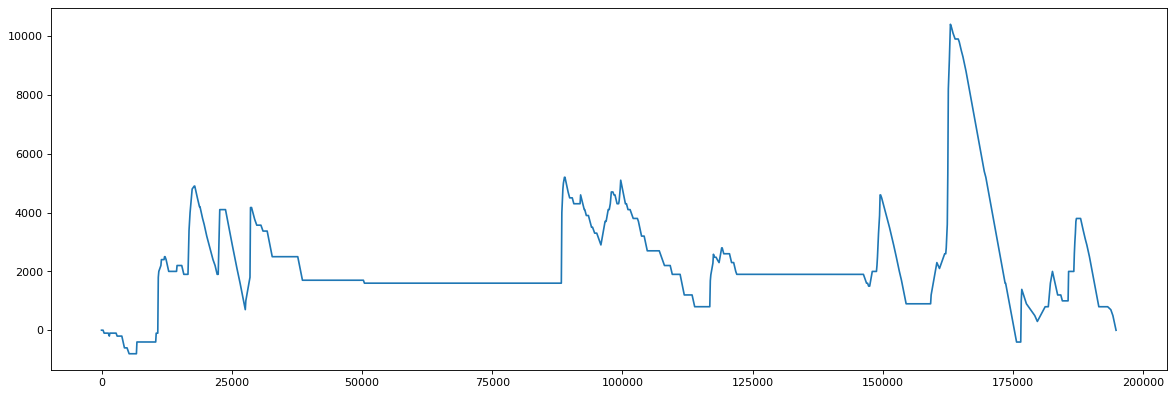

In [18]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df2["kp"], df2["dKp"])

# Transform angles to Azimuth based coordinate system

In [19]:
df1["azimuth"] = calAzimuth(df1)
df2["azimuth"] = calAzimuth(df2)

In [20]:
len(df1)

1480

In [21]:
from math import cos,sin,tan,atan,degrees,radians
l=[]
for i, g_vector in df2.iterrows():
    a=g_vector["azimuth"]
    t_m = np.array([[cos(a), sin(a),0],[-sin(a), cos(a), 0],[0,0,1]])
    l_vector=t_m*[(g_vector["nx"]),(g_vector["ny"]),(g_vector["nz"])]    
    ax_an=degrees(atan(l_vector[0][0]/l_vector[2][2]))
    lat_an=degrees(atan(l_vector[1][1]/l_vector[2][2]))
#     print("o",(angle.nx), (angle.ny), (angle.nz))
#     print("t",round(degrees(angle.azimuth),3), round(ax_an,3), round(lat_an,3))
    
    l.append({"ax_an":ax_an, "lat_an":lat_an})
_df=pd.DataFrame(l)
df2 = df2.join(_df)

In [22]:
from math import cos,sin,tan,atan,degrees,radians
import numpy as np
g=np.array([[344.729,2.891,17.845],
[451.9433,943.8932,-1363.0841]])
a=atan((g[1][1]-g[0][1])/(g[1][0]-g[0][0]))
print(f"Azimuth is {degrees(a)} deg")
t_m = np.array([[cos(a), sin(a),0],[-sin(a), cos(a), 0],[0,0,1]])
print(f"Transformation matrix with given azimuth is \n{t_m}")
l=[]
for vect in g:
    l.append(t_m.dot(vect))
print(f"Local vectors in coordinate system rotated around Z axis for azimuth angle are\n {l}")
print(f"Note that now Y of {l[0][1]} is constant and could be ignored in the analysis \n \
      but needs to be taken into account when transforming back to global")

Azimuth is 83.49996141503874 deg
Transformation matrix with given azimuth is 
[[ 0.11320388  0.99357178  0.        ]
 [-0.99357178  0.11320388  0.        ]
 [ 0.          0.          1.        ]]
Local vectors in coordinate system rotated around Z axis for azimuth angle are
 [array([  41.89707735, -342.18573353,   17.845     ]), array([  988.98738273,  -342.18573353, -1363.0841    ])]
Note that now Y of -342.18573352966666 is constant and could be ignored in the analysis 
       but needs to be taken into account when transforming back to global


In [23]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

v = [344.729,2.891,17.845]
axis = [0,0,1]
theta = a 
print(rotation_matrix(axis, theta))
print(np.dot(rotation_matrix(axis, theta), g[0])) 
print(np.dot(rotation_matrix(axis, theta), g[1])) 
# [ 2.74911638  4.77180932  1.91629719]

[[ 0.11320388 -0.99357178  0.        ]
 [ 0.99357178  0.11320388  0.        ]
 [ 0.          0.          1.        ]]
[ 36.15224532 342.84027838  17.845     ]
[ -886.66390993   555.89048405 -1363.0841    ]


In [24]:
df2

,x,y,z,nx,ny,nz,kp,dz,dx,z2000,dz_inter,dKp,azimuth,ax_an,lat_an
0,0.000000,0.12000,37.449802,-0.083793,0.030611,0.996013,0.000000,1.340630,0.000000e+00,38.790432,1.340630,0.000000,0.000000,-4.808856,1.760374
1,2.830831,100.07905,34.615814,-0.083793,0.030611,0.996013,100.039276,4.407516,-6.000000e-07,39.023423,4.407609,-0.039904,0.028312,-4.806938,1.759669
2,5.661662,200.03812,31.785800,-0.071366,0.018117,0.997286,200.078460,7.470426,-2.300000e-06,39.256412,7.470612,-0.079705,0.028312,-4.091474,1.040304
3,8.492495,299.99722,30.172520,-0.071366,0.018117,0.997286,300.090649,9.316604,-5.000000e-06,39.486876,9.314356,-0.092536,0.028312,-4.091474,1.040304
4,14.154160,499.91547,27.373564,-0.027937,0.048984,0.998409,500.108636,9.685522,-2.830842e+00,33.195642,5.822078,-100.081946,0.028312,-1.602190,2.807669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,-41265.855000,171303.75000,-1610.452600,-0.003552,0.003850,0.999986,193054.703105,1.950300,7.451450e+02,-1610.797266,-0.344666,797.349232,1.198340,-0.074060,0.080275
1476,-41172.715000,171340.14000,-1610.275100,-0.003552,0.006408,0.999973,193154.699721,1.882000,7.451490e+02,-1610.490673,-0.215573,797.352860,1.198347,-0.074059,0.133605
1477,-40613.848000,171558.47000,-1609.538000,-0.005636,0.008017,0.999952,193754.700434,1.691000,6.520000e+02,-1608.654849,0.883151,697.351503,1.198354,-0.117507,0.167167
1478,-40241.273000,171704.03000,-1609.651700,-0.004126,0.010371,0.999938,194154.700256,2.023200,4.657130e+02,-1608.171768,1.479932,497.348530,1.198345,-0.086031,0.216251


In [25]:
p_lat_max = df2[df2["lat_an"]==df2["lat_an"].max()]
p_lat_max

,x,y,z,nx,ny,nz,kp,dz,dx,z2000,dz_inter,dKp,azimuth,ax_an,lat_an
21,65.10928,2299.1843,-28.148174,0.036991,0.063162,0.997318,2301.416668,8.886284,-2.830857,-20.226692,7.921482,-100.386838,0.028312,2.123277,3.622368


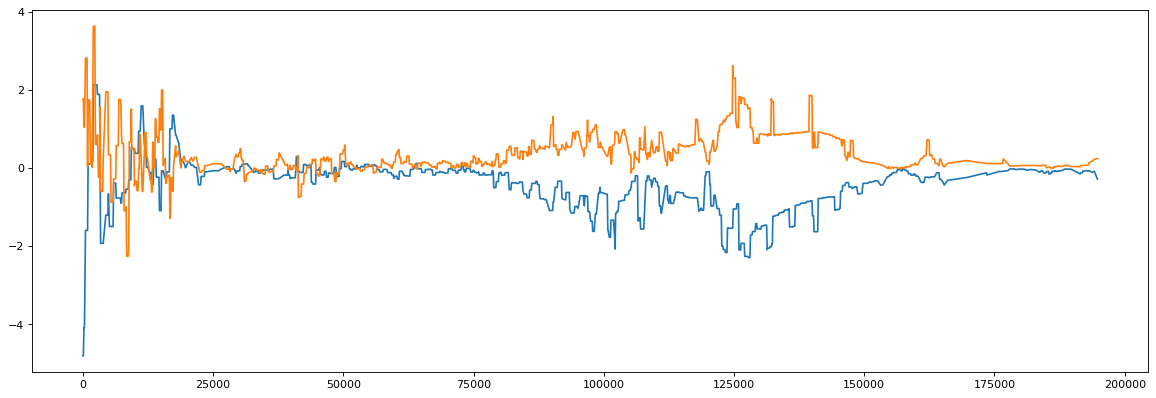

In [26]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df2["kp"],df2["ax_an"])
plt.plot(df2["kp"],df2["lat_an"])

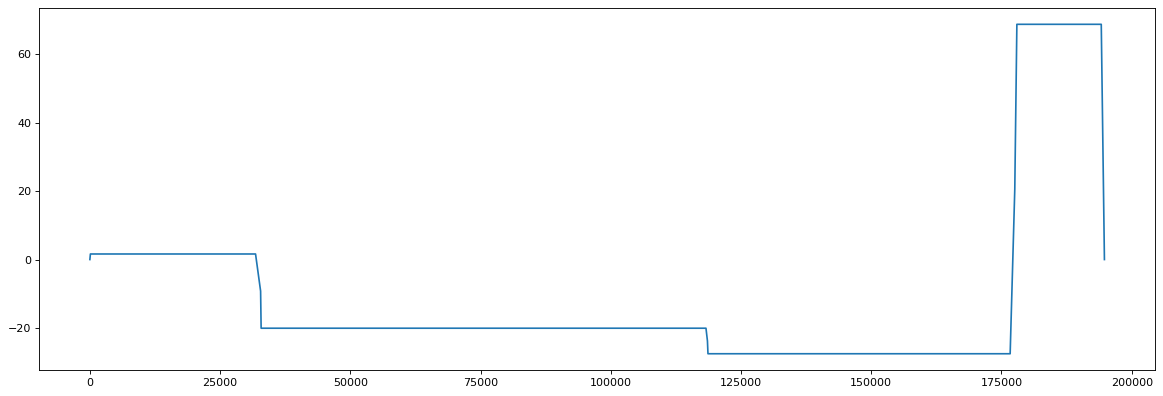

In [27]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df2["kp"],180/math.pi*(df2["azimuth"]))

# load seabeds and analyse 

In [28]:
sb500 = pd.read_csv("GEBCO_2019_-5.0_63.0_-1.0_60.0_UTM-500m.csv_origin_595815.05_6705300.32.csv",header = None)
sb2000 = pd.read_csv("GEBCO_2019_-5.0_63.0_-1.0_60.0_UTM-2000m.csv_origin_595815.05_6705300.32.csv",header = None)
sb500.columns = ["x","y","z"]
sb2000.columns = ["x","y","z"]

In [29]:
sb500

,x,y,z
0,-196859.09,282334.97,-2172.416504
1,-196359.09,282334.97,-2179.303223
2,-195859.09,282334.97,-2181.634277
3,-195359.09,282334.97,-2185.758057
4,-194859.09,282334.97,-2194.575195
...,...,...,...
285436,-58859.09,-53665.03,-103.390999
285437,-58359.09,-53665.03,-101.992996
285438,-57859.09,-53665.03,-101.102997
285439,-57359.09,-53665.03,-98.827003


In [30]:
def closest_node(node, nodes):
#     nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    return np.argmin(dist_2)

In [31]:
np.asarray(p_lat_max.iloc[:,:2])

array([[  65.10928, 2299.1843 ]])

In [32]:
np.asarray(sb2000.iloc[:,:2])

array([[-195359.09,  282334.97],
       [-193359.09,  282334.97],
       [-191359.09,  282334.97],
       ...,
       [ -61359.09,  -53665.03],
       [ -59359.09,  -53665.03],
       [ -57359.09,  -53665.03]])

In [33]:
closest_node(np.asarray(p_lat_max.iloc[:,:2]), np.asarray(sb2000.iloc[:,:2]))

14809

In [31]:
sb2000.iloc[[closest_node(np.asarray(p_lat_max.iloc[:,:2]), np.asarray(sb2000.iloc[:,:2]))]]

,x,y,z
14809,640.91,2334.97,-28.459999


In [32]:
sb2000.iloc[[14]]

,x,y,z
14,-183359.09,280334.97,-2115.733887


In [33]:
sb500.iloc[[closest_node(np.asarray(p_lat_max.iloc[:,:2]), np.asarray(sb500.iloc[:,:2]))]]

,x,y,z
236298,140.91,2334.97,-33.226002


In [34]:
x= float(p_lat_max.x)
y= float(p_lat_max.y)

def closest_node3(df,x,y,mesh_size):
    nearest_points=[]
    new_origin = [x, y]
    suggested_new_origin = [new_origin]
#     print('Turning X/Y data into a 2d tree.')
    import sklearn.neighbors
    # Searching only within +/- vicinity of the new origin.
    VICINITY = 2000
    vicinity = VICINITY
    narrow_x = (df['x'] > int(x) - vicinity) & \
                      (df['x'] < int(x) + vicinity)
    narrow_y = (df['y'] > int(y) - vicinity) & \
                       (df['y'] < int(y) + vicinity)
    _df = df.loc[narrow_x & narrow_y, ['x', 'y']]
    if _df.empty:
        raise ValueError('{:s} outside of the mesh boundaries.'.format(pretext))
    tree = sklearn.neighbors.KDTree(_df.values)
    d, i = tree.query(suggested_new_origin)
    new_origin = tree.get_arrays()[0][i[0][0]]
    distance = d[0][0]
#     print(f'Closest distance to the mesh: %.2f. Closest point is {new_origin}.' % distance)
    if x>new_origin[0]:
        nearest_points.append(df[(df["x"]==round(new_origin[0]+mesh_size,3)) & (df["y"]==new_origin[1])].values.tolist()[0])
    if y>new_origin[1]:
        nearest_points.append(df[(df["y"]==round(new_origin[1]+mesh_size,3)) & (df["x"]==new_origin[0])].values.tolist()[0])
    else:
        nearest_points.append(df[(df["x"]==round(new_origin[0]-mesh_size,3)) & (df["y"]==new_origin[1])].values.tolist()[0])
        nearest_points.append(df[(df["y"]==round(new_origin[1]-mesh_size,3)) & (df["x"]==new_origin[0])].values.tolist()[0])
    nearest_points.append(df[(df["x"]==new_origin[0]) & (df["y"]==new_origin[1])].values.tolist()[0])
#     print("Nearest points are:",nearest_points)
    return nearest_points

In [35]:
np2000=closest_node3(sb2000,x,y,2000)
np2000

[[-1359.09, 2334.97, -1.01400005817413],
 [640.91, 334.97, 49.7470016479492],
 [640.91, 2334.97, -28.4599990844727]]

In [36]:
np500=closest_node3(sb500,x,y,500)
np500

Closest distance to the mesh: 83.82. Closest point is [ 140.91 2334.97].
Nearest points are: [[-359.09, 2334.97, -14.680999755859402], [140.91, 1834.97, -1.5599999427795401], [140.91, 2334.97, -33.226001739502]]


[[-359.09, 2334.97, -14.680999755859402],
 [140.91, 1834.97, -1.5599999427795401],
 [140.91, 2334.97, -33.226001739502]]

In [37]:
x,y

(65.10928, 2299.1843)

In [38]:
def equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):    
    a1 = x2 - x1 
    b1 = y2 - y1 
    c1 = z2 - z1 
    a2 = x3 - x1 
    b2 = y3 - y1 
    c2 = z3 - z1 
    a = b1 * c2 - b2 * c1 
    b = a2 * c1 - a1 * c2 
    c = a1 * b2 - b1 * a2 
    d = (- a * x1 - b * y1 - c * z1) 
#     print ("equation of plane is ") 
#     print (f"{a} x + {b} y + {c} z + {d} = 0.")
    return f"(-{a}*x - {b}*y - {d})/{c}"

In [39]:
fp = equation_plane(np2000[0][0],np2000[0][1],np2000[0][2],np2000[1][0],np2000[1][1],np2000[1][2],np2000[2][0],np2000[2][1],np2000[2][2])

In [40]:
# za xy z na ravnini je
eval(fp)

-19.15893995118657

In [41]:
fp = equation_plane(np500[0][0],np500[0][1],np500[0][2],np500[1][0],np500[1][1],np500[1][2],np500[2][0],np500[2][1],np500[2][2])

In [42]:
eval(fp)

-28.148172652984975

In [61]:
def lineAdjustment(sb,linepoints,sb_mesh_size):
    z=[]
    for point in linepoints:
        x=point[0]
        y=point[1]
#         print(x,y)
        npt = closest_node3(sb,x,y,sb_mesh_size)
        if len(npt)<3:
            z.append(0)
            continue
        fp = equation_plane(npt[0][0],npt[0][1],npt[0][2],npt[1][0],npt[1][1],npt[1][2],npt[2][0],npt[2][1],npt[2][2])
        z.append(eval(fp))
    return z

In [62]:
_l = zip(df2.x.values, df2.y.values)
linepoints = list(_l)
z= lineAdjustment(sb500, linepoints, 500)

In [63]:
df2["z_cal"] = z
df2.z-df2.z_cal

0       37.449802
1       -1.735380
2       -1.695826
3       -0.439537
4       27.373564
          ...    
1475     0.017184
1476     0.000078
1477    -0.000146
1478    -0.287042
1479     0.039084
Length: 1480, dtype: float64

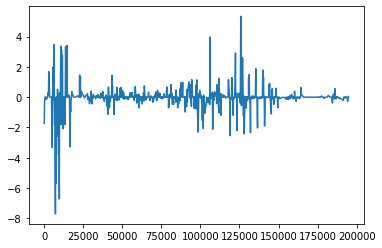

In [71]:
# usporedba z nadjen preko najblize tocke i ravnine kroz 3 tocke i rezulata od Daga.  
df= df2[df2.z_cal!=0]
plt.plot(df.kp, (df.z-df.z_cal))

# compare seabeds

In [77]:
sb2000.iloc[2].x

-191359.09

In [36]:
for index,p in sb2000.iterrows():
#     sb500[(sb500.x==sb2000.p.x)&((sb500.y==p.y))]
#     print(p.z, sb500[(sb500.x==p.x)&((sb500.y==p.y))].z)

SyntaxError: unexpected EOF while parsing (<ipython-input-36-48bd805465e3>, line 3)

In [81]:
sb500[(sb500.x==sb2000.x)&((sb500.y==sb2000.y))]

ValueError: Can only compare identically-labeled Series objects

In [8]:
""" invdisttree.py: inverse-distance-weighted interpolation using KDTree
    fast, solid, local
"""
from __future__ import division
import numpy as np
from scipy.spatial import cKDTree as KDTree
    # http://docs.scipy.org/doc/scipy/reference/spatial.html

__date__ = "2010-11-09 Nov"  # weights, doc

#...............................................................................
class Invdisttree:
    """ inverse-distance-weighted interpolation using KDTree:
invdisttree = Invdisttree( X, z )  -- data points, values
interpol = invdisttree( q, nnear=3, eps=0, p=1, weights=None, stat=0 )
    interpolates z from the 3 points nearest each query point q;
    For example, interpol[ a query point q ]
    finds the 3 data points nearest q, at distances d1 d2 d3
    and returns the IDW average of the values z1 z2 z3
        (z1/d1 + z2/d2 + z3/d3)
        / (1/d1 + 1/d2 + 1/d3)
        = .55 z1 + .27 z2 + .18 z3  for distances 1 2 3

    q may be one point, or a batch of points.
    eps: approximate nearest, dist <= (1 + eps) * true nearest
    p: use 1 / distance**p
    weights: optional multipliers for 1 / distance**p, of the same shape as q
    stat: accumulate wsum, wn for average weights

How many nearest neighbors should one take ?
a) start with 8 11 14 .. 28 in 2d 3d 4d .. 10d; see Wendel's formula
b) make 3 runs with nnear= e.g. 6 8 10, and look at the results --
    |interpol 6 - interpol 8| etc., or |f - interpol*| if you have f(q).
    I find that runtimes don't increase much at all with nnear -- ymmv.

p=1, p=2 ?
    p=2 weights nearer points more, farther points less.
    In 2d, the circles around query points have areas ~ distance**2,
    so p=2 is inverse-area weighting. For example,
        (z1/area1 + z2/area2 + z3/area3)
        / (1/area1 + 1/area2 + 1/area3)
        = .74 z1 + .18 z2 + .08 z3  for distances 1 2 3
    Similarly, in 3d, p=3 is inverse-volume weighting.

Scaling:
    if different X coordinates measure different things, Euclidean distance
    can be way off.  For example, if X0 is in the range 0 to 1
    but X1 0 to 1000, the X1 distances will swamp X0;
    rescale the data, i.e. make X0.std() ~= X1.std() .

A nice property of IDW is that it's scale-free around query points:
if I have values z1 z2 z3 from 3 points at distances d1 d2 d3,
the IDW average
    (z1/d1 + z2/d2 + z3/d3)
    / (1/d1 + 1/d2 + 1/d3)
is the same for distances 1 2 3, or 10 20 30 -- only the ratios matter.
In contrast, the commonly-used Gaussian kernel exp( - (distance/h)**2 )
is exceedingly sensitive to distance and to h.

    """
# anykernel( dj / av dj ) is also scale-free
# error analysis, |f(x) - idw(x)| ? todo: regular grid, nnear ndim+1, 2*ndim

    def __init__( self, X, z, leafsize=10, stat=0 ):
        assert len(X) == len(z), "len(X) %d != len(z) %d" % (len(X), len(z))
        self.tree = KDTree( X, leafsize=leafsize )  # build the tree
        self.z = z
        self.stat = stat
        self.wn = 0
        self.wsum = None;

    def __call__( self, q, nnear=6, eps=0, p=1, weights=None ):
            # nnear nearest neighbours of each query point --
        q = np.asarray(q)
        qdim = q.ndim
        if qdim == 1:
            q = np.array([q])
        if self.wsum is None:
            self.wsum = np.zeros(nnear)

        self.distances, self.ix = self.tree.query( q, k=nnear, eps=eps )
        interpol = np.zeros( (len(self.distances),) + np.shape(self.z[0]) )
        jinterpol = 0
        for dist, ix in zip( self.distances, self.ix ):
            if nnear == 1:
                wz = self.z[ix]
            elif dist[0] < 1e-10:
                wz = self.z[ix[0]]
            else:  # weight z s by 1/dist --
                w = 1 / dist**p
                if weights is not None:
                    w *= weights[ix]  # >= 0
                w /= np.sum(w)
                wz = np.dot( w, self.z[ix] )
                if self.stat:
                    self.wn += 1
                    self.wsum += w
            interpol[jinterpol] = wz
            jinterpol += 1
        return interpol if qdim > 1  else interpol[0]



In [14]:
X=sb2000.iloc[:,:2]
z=sb2000.z
invdisttree = Invdisttree( X, z )  #-- data points, values
q = (-3123,3456)
interpol = invdisttree( q, nnear=3, eps=0, p=1, weights=None)

In [15]:
interpol

-12.982392730176905

In [ ]:
def lineAdjustment2(sb,linepoints):
    z=[]
    for point in linepoints:
        x=point[0]
        y=point[1]
#         print(x,y)
        npt = closest_node3(sb,x,y,sb_mesh_size)
        if len(npt)<3:
            z.append(0)
            continue
        fp = equation_plane(npt[0][0],npt[0][1],npt[0][2],npt[1][0],npt[1][1],npt[1][2],npt[2][0],npt[2][1],npt[2][2])
        z.append(eval(fp))
    return z

In [ ]:
#...............................................................................
if __name__ == "__main__":
    import sys

    N = 10000
    Ndim = 2
    Nask = N  # N Nask 1e5: 24 sec 2d, 27 sec 3d on mac g4 ppc
    Nnear = 8  # 8 2d, 11 3d => 5 % chance one-sided -- Wendel, mathoverflow.com
    leafsize = 10
    eps = .1  # approximate nearest, dist <= (1 + eps) * true nearest
    p = 1  # weights ~ 1 / distance**p
    cycle = .25
    seed = 1

    exec ( "\n".join( sys.argv[1:] ))  # python this.py N= ...
    np.random.seed(seed )
    np.set_printoptions( 3, threshold=100, suppress=True )  # .3f

    print ("\nInvdisttree:  N %d  Ndim %d  Nask %d  Nnear %d  leafsize %d  eps %.2g  p %.2g" % (
        N, Ndim, Nask, Nnear, leafsize, eps, p))

    def terrain(x):
        """ ~ rolling hills """
        return np.sin( (2*np.pi / cycle) * np.mean( x, axis=-1 ))

    known = np.random.uniform( size=(N,Ndim) ) ** .5  # 1/(p+1): density x^p
    z = terrain( known )
    ask = np.random.uniform( size=(Nask,Ndim) )

#...............................................................................
    invdisttree = Invdisttree( known, z, leafsize=leafsize, stat=1 )
    interpol = invdisttree( ask, nnear=Nnear, eps=eps, p=p )

    print ("average distances to nearest points: %s" % \
        np.mean( invdisttree.distances, axis=0 ))
    print ("average weights: %s" % (invdisttree.wsum / invdisttree.wn))
        # see Wikipedia Zipf's law
    err = np.abs( terrain(ask) - interpol )
    print ("average |terrain() - interpolated|: %.2g" % np.mean(err))

    # print "interpolate a single point: %.2g" % \
    #     invdisttree( known[0], nnear=Nnear, eps=eps )